In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#dataset = pd.read_csv('/content/drive/MyDrive/kaggle/parkinsons.data')
dataset = pd.read_csv("/content/drive/MyDrive/kaggle/parkinsons.data", sep=',', index_col='name')

In [ ]:
dataset.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
dataset.shape

(195, 23)

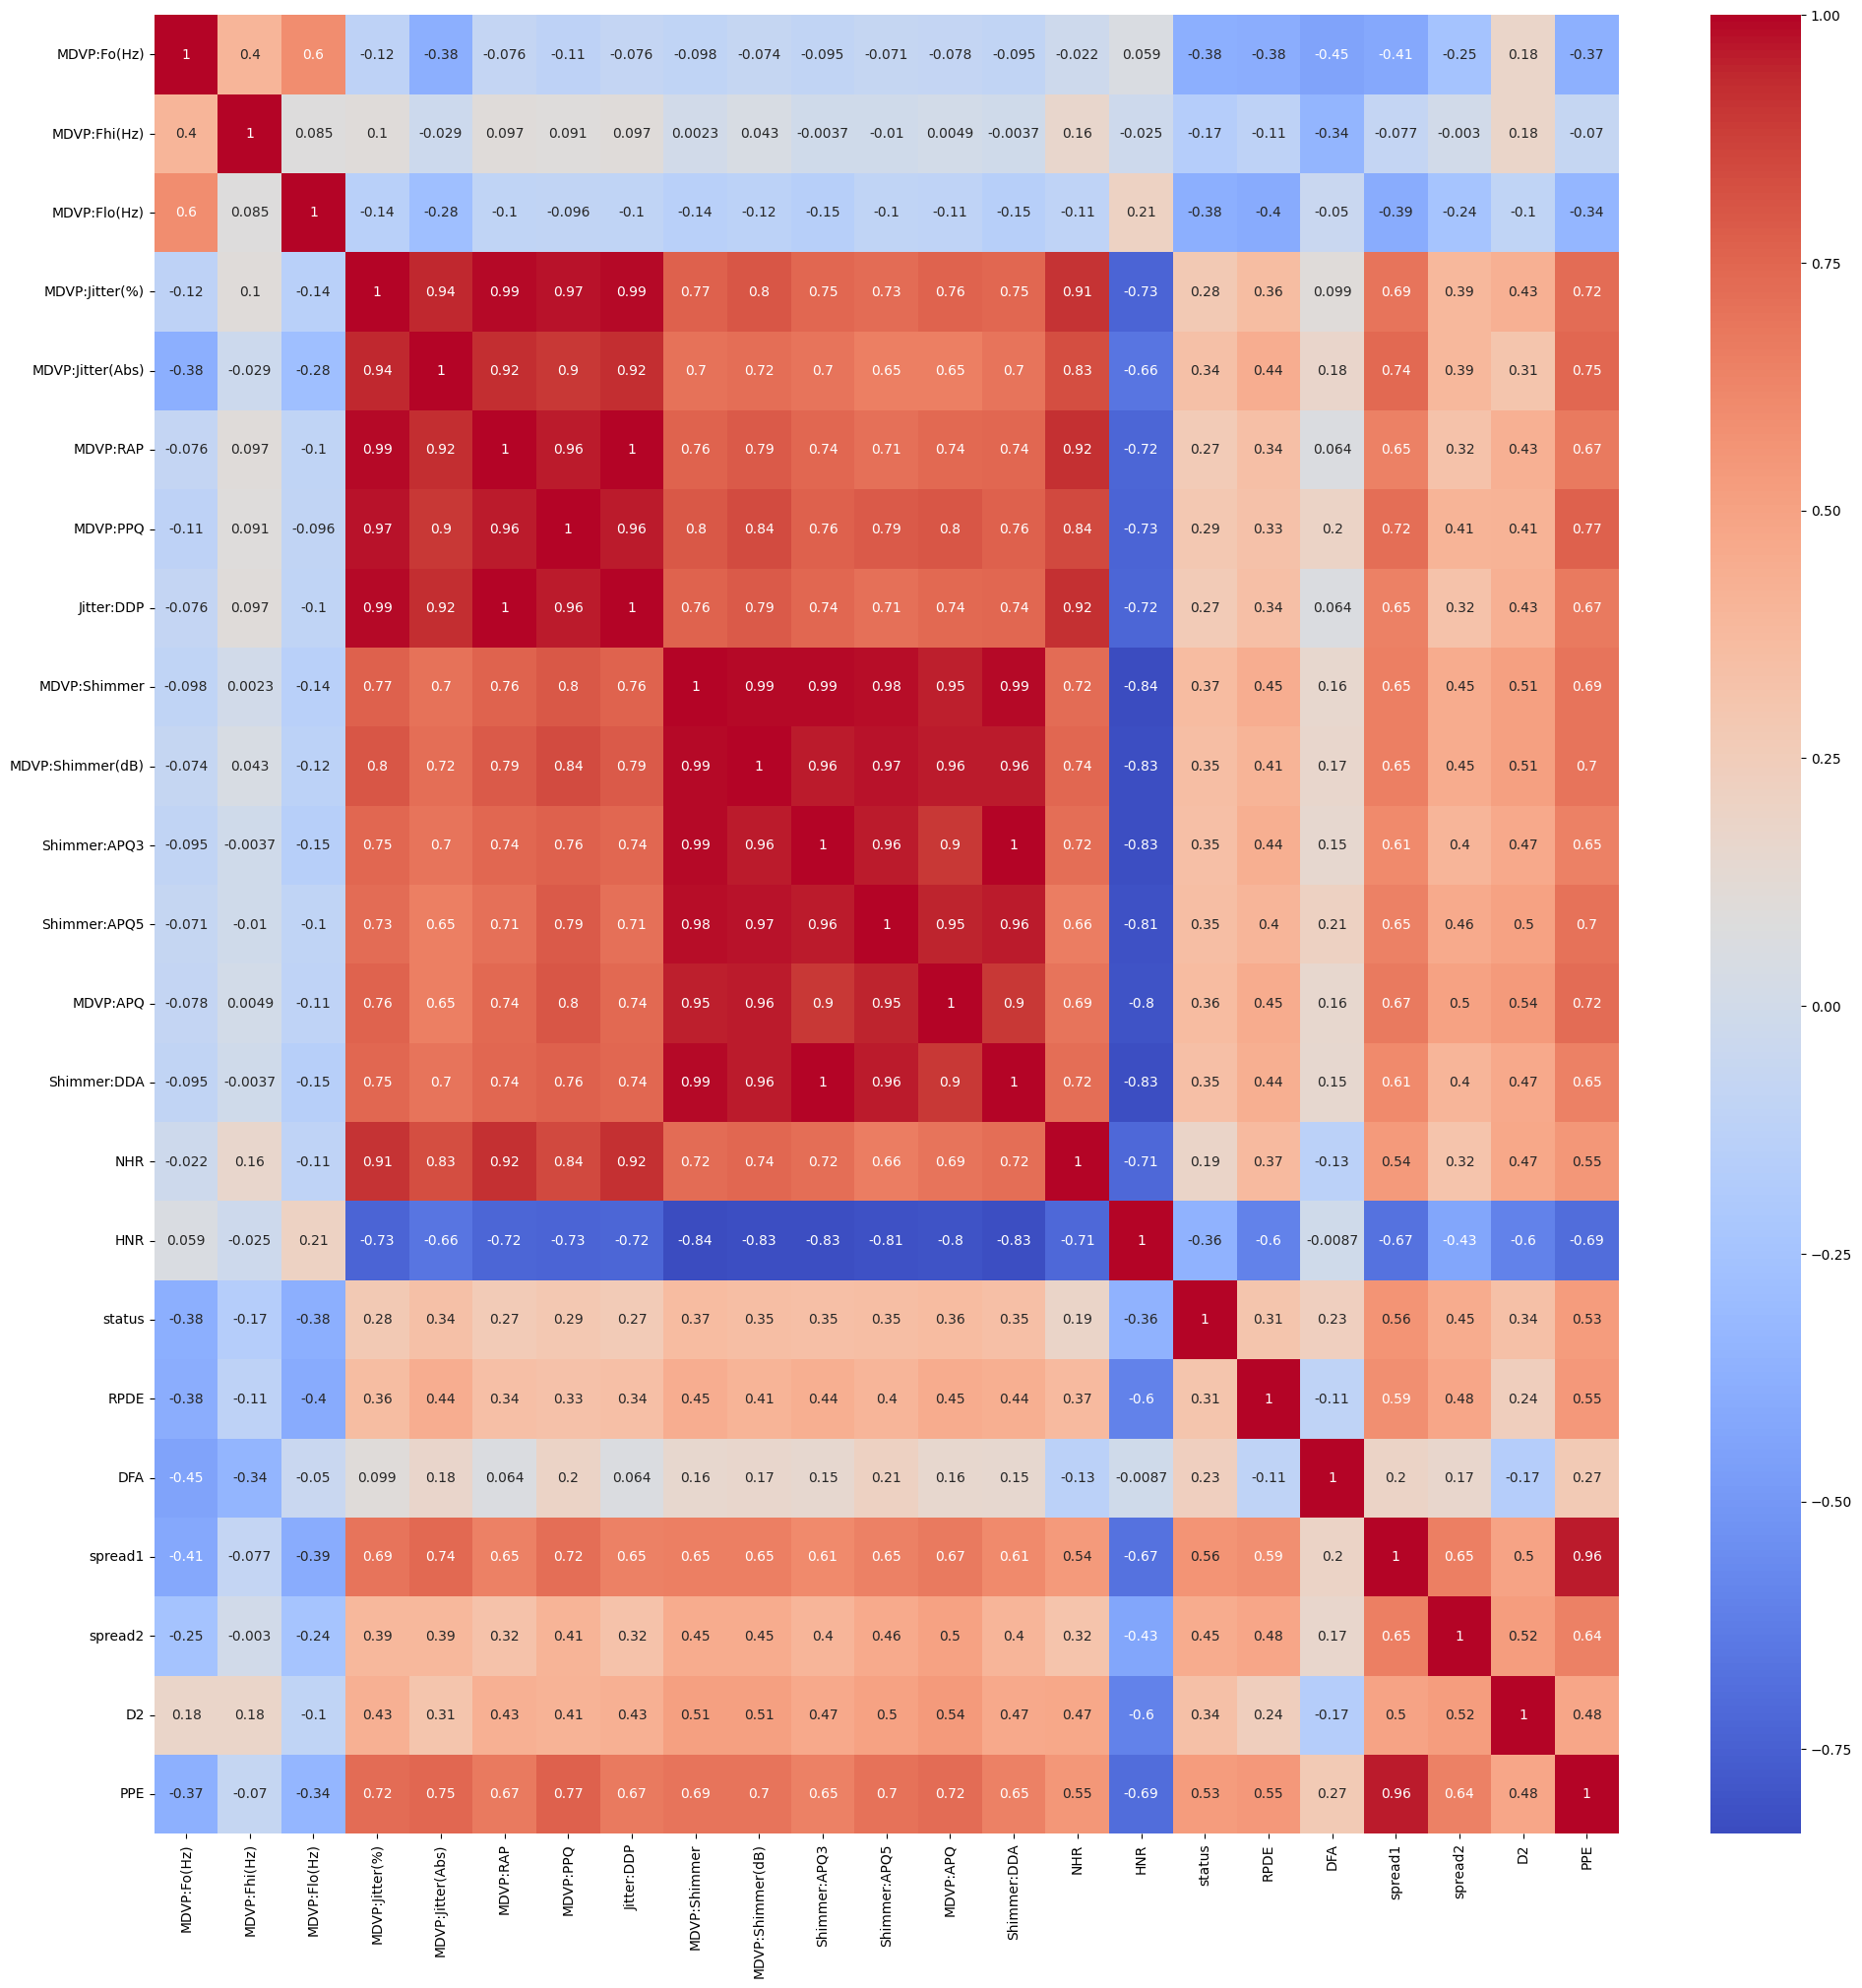

In [ ]:
# Correlation matrix
corr = dataset.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

In [ ]:
import numpy as np
x = dataset.iloc[: , np.r_[0:16, 17:23]].values
y = dataset.iloc[: , 16].values

In [ ]:
print(x)
dataset.shape

[[1.199920e+02 1.573020e+02 7.499700e+01 ... 2.664820e-01 2.301442e+00
  2.846540e-01]
 [1.224000e+02 1.486500e+02 1.138190e+02 ... 3.355900e-01 2.486855e+00
  3.686740e-01]
 [1.166820e+02 1.311110e+02 1.115550e+02 ... 3.111730e-01 2.342259e+00
  3.326340e-01]
 ...
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 [1.987640e+02 3.969610e+02 7.490400e+01 ... 2.074540e-01 2.138608e+00
  1.233060e-01]
 [2.142890e+02 2.602770e+02 7.797300e+01 ... 1.906670e-01 2.555477e+00
  1.485690e-01]]


(195, 23)

In [ ]:
x.shape

(195, 22)

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),[0])], remainder='passthrough')
# x = np.array(ct.fit_transform(x))

In [ ]:
x.shape[1]

22

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1)

In [ ]:
print(y_train)

[0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(x_train)

[[ 1.293360e+02  1.398670e+02  1.186040e+02  4.900000e-03  4.000000e-05
   1.650000e-03  1.830000e-03  4.950000e-03  2.498000e-02  2.280000e-01
   1.396000e-02  1.219000e-02  1.947000e-02  4.188000e-02  4.840000e-03
   2.542900e+01  4.203830e-01  7.857140e-01 -6.836811e+00  2.698660e-01
   2.223719e+00  1.474910e-01]
 [ 1.528450e+02  1.633050e+02  7.583600e+01  2.940000e-03  2.000000e-05
   1.210000e-03  1.490000e-03  3.640000e-03  1.828000e-02  1.580000e-01
   1.064000e-02  9.720000e-03  1.246000e-02  3.191000e-02  6.090000e-03
   2.492200e+01  4.747910e-01  6.540270e-01 -6.105098e+00  2.036530e-01
   2.125618e+00  1.701000e-01]
 [ 2.171160e+02  2.334810e+02  9.397800e+01  4.040000e-03  2.000000e-05
   1.270000e-03  1.280000e-03  3.810000e-03  1.299000e-02  1.240000e-01
   6.790000e-03  6.310000e-03  1.075000e-02  2.038000e-02  6.810000e-03
   2.458100e+01  4.625160e-01  5.827100e-01 -5.517173e+00  3.892950e-01
   2.925862e+00  2.206570e-01]
 [ 1.564050e+02  1.893980e+02  1.428220e+02

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# x_train[:,195:] = sc.fit_transform(x_train[:,195:])
# x_test[:,195:] = sc.transform(x_test[:,195:])
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train

array([[-6.14439715e-01, -6.17806550e-01,  4.12792275e-02,
        -2.88146771e-01, -1.26896497e-01, -5.56133501e-01,
        -5.86114477e-01, -5.56200064e-01, -2.86662179e-01,
        -3.11270441e-01, -2.06425319e-01, -5.00659489e-01,
        -3.01648085e-01, -2.06432797e-01, -5.06285017e-01,
         8.24782709e-01, -7.50894465e-01,  1.22314679e+00,
        -1.10091312e+00,  5.02909195e-01, -4.07513755e-01,
        -6.82232147e-01],
       [-4.03485144e-02, -3.54151747e-01, -9.80885970e-01,
        -6.69730021e-01, -6.82179904e-01, -6.95766991e-01,
        -7.02643121e-01, -6.94772035e-01, -6.29648704e-01,
        -6.54195502e-01, -5.23953686e-01, -6.99298376e-01,
        -6.95786588e-01, -5.24282042e-01, -4.77156928e-01,
         7.12435726e-01, -2.39239363e-01, -1.18279643e+00,
        -4.15715213e-01, -2.89584971e-01, -6.54153954e-01,
        -4.28180117e-01],
       [ 1.52915319e+00,  4.35260294e-01, -5.47287929e-01,
        -4.55576156e-01, -6.82179904e-01, -6.76726060e-01,
    

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)


LogisticRegression(random_state=0)

In [ ]:
test_value = [[ 5.29249395e-01, -1.03309592e-01,  1.11583374e+00,
        -5.23716022e-01, -6.82179904e-01, -4.29193964e-01,
        -4.66158519e-01, -4.28206106e-01, -6.17874540e-01,
        -6.05206208e-01, -6.44461440e-01, -5.48107644e-01,
        -5.58034900e-01, -6.44471776e-01, -5.39840575e-01,
         7.18861885e-01, -1.49332475e+00,  1.18499869e+00,
        -3.23304568e-01, -3.76742214e-01,  3.78931110e-01,
        -3.93143882e-01]]

print(classifier.predict(test_value))

[1]


In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 7  3]
 [ 2 27]]


0.8717948717948718

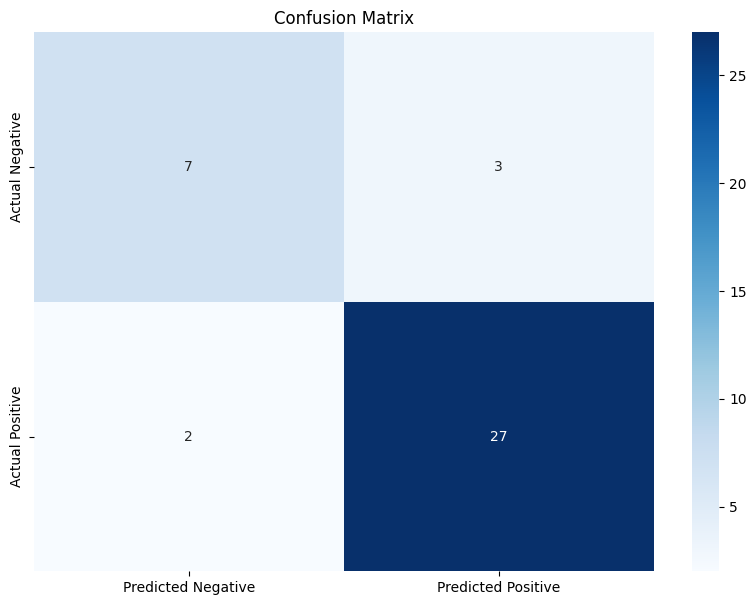

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(10,7))

# Create a heatmap from the DataFrame.
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

LR_model_filename = "LR_model.pkl"

with open(LR_model_filename,"wb") as file:
  pickle.dump(classifier,file)

In [ ]:
with open(LR_model_filename,"rb") as file:
  Pickle_LR_model = pickle.load(file)

In [ ]:
test_value = [[ 5.29249395e-01, -1.03309592e-01,  1.11583374e+00,
        -5.23716022e-01, -6.82179904e-01, -4.29193964e-01,
        -4.66158519e-01, -4.28206106e-01, -6.17874540e-01,
        -6.05206208e-01, -6.44461440e-01, -5.48107644e-01,
        -5.58034900e-01, -6.44471776e-01, -5.39840575e-01,
         7.18861885e-01, -1.49332475e+00,  1.18499869e+00,
        -3.23304568e-01, -3.76742214e-01,  3.78931110e-01,
        -3.93143882e-01]]

print(Pickle_LR_model.predict(test_value))

[1]


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 6  4]
 [ 1 28]]


0.8717948717948718

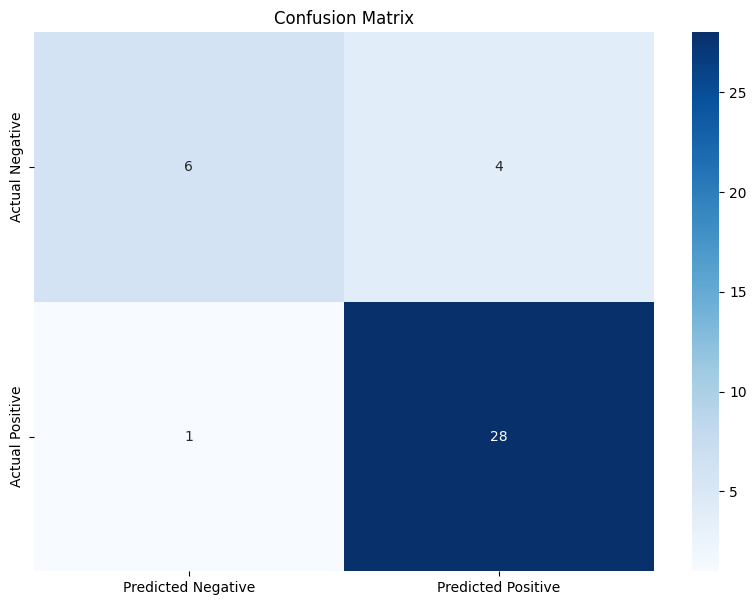

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(10,7))

# Create a heatmap from the DataFrame.
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear',random_state = 0)
svm_classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = svm_classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]]


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 6  4]
 [ 3 26]]


0.8205128205128205

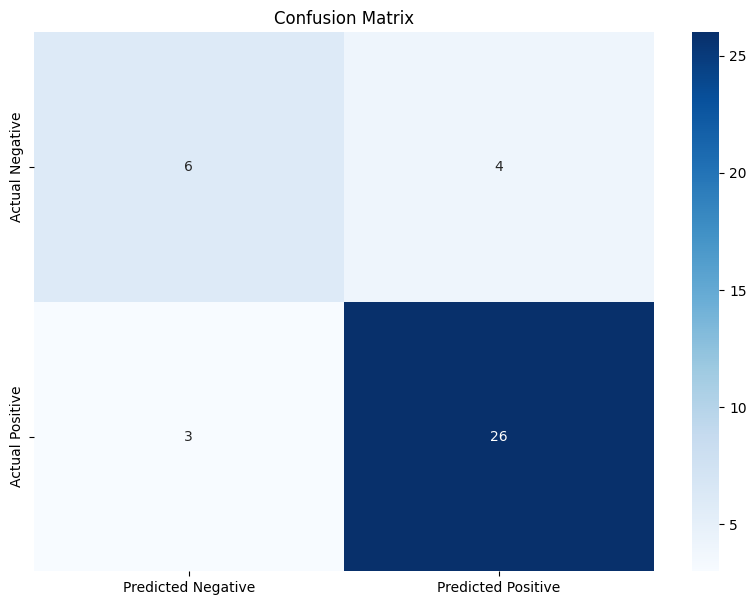

In [ ]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(10,7))

# Create a heatmap from the DataFrame.
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')

plt.title('Confusion Matrix')
plt.show()